In [19]:
import os
import pandas as pd
import re
from collections import defaultdict


def find_seed_dirs(base_dir):
    seed_dirs = defaultdict(list)
    pattern = re.compile(r'(Seed\d+)$')  # matches "Seed" followed by digits at the end

    for name in os.listdir(base_dir):
        path = os.path.join(base_dir, name)
        if os.path.isdir(path):
            match = pattern.search(name)
            if match:
                seed = match.group(1)  # e.g., "Seed42"
                seed_dirs[seed].append(path)
    
    return dict(seed_dirs)

base_path = '/home/eric/Documents/cervicalResearchIIP/result_test/MCEffectiveness3'  # Change this
max_dir = 100  # Set the maximum directory number you want to check

channels = ['10xChannels', '20xChannels', '30xChannels', '40xChannels', '50xChannels', '60xChannels', '70xChannels', '80xChannels', '90xChannels', '100xChannels', '108xChannels']


result = find_seed_dirs(base_path)
seeds = list(result.keys())
print(seeds)

base_path = '/home/eric/Documents/cervicalResearchIIP/result_test/MCEffectiveness3/20250511-'  
results = []

for channel in channels:
    for seed in seeds:
        dir_name = channel + '-' + seed
        dir_path = base_path + dir_name
        csv_path = os.path.join(dir_path, 'Dice.csv')
        
        if os.path.isdir(dir_path) and os.path.exists(csv_path):
            df = pd.read_csv(csv_path, header=None)
            last_value = df.values.flatten()[-1]
            results.append([dir_name, float(last_value)])
        else:
            print(f"Skipping {dir_path} (missing or no CSV)")

# Create DataFrame
df = pd.DataFrame(results, columns=['directory_name', 'last_value'])
print(df)


# At the end of your script
output_path = '/home/eric/Documents/cervicalResearchIIP/result_test/MCEffectiveness3/result.xlsx'  # Change this to your desired output location

df.to_excel(output_path, index=False)
# print(f"Saved summary to {output_path}")


['Seed119908', 'Seed94639', 'Seed26652', 'Seed44578', 'Seed182594', 'Seed85298', 'Seed150422', 'Seed81977', 'Seed12954', 'Seed21728', 'Seed31015', 'Seed108617', 'Seed28799', 'Seed50166', 'Seed162697', 'Seed5023', 'Seed52596', 'Seed1872', 'Seed162322', 'Seed191841', 'Seed119989', 'Seed37824', 'Seed45607', 'Seed38560', 'Seed155675', 'Seed124579', 'Seed47588', 'Seed78009', 'Seed90704', 'Seed139755', 'Seed147197', 'Seed113183', 'Seed85858', 'Seed174269', 'Seed5269', 'Seed78330', 'Seed121803', 'Seed91068', 'Seed34809', 'Seed47664', 'Seed55465', 'Seed122749', 'Seed176833', 'Seed72628', 'Seed175804', 'Seed105084', 'Seed75108', 'Seed87451', 'Seed13618', 'Seed161800', 'Seed58601', 'Seed166397', 'Seed161312', 'Seed189592', 'Seed24374', 'Seed80145', 'Seed5524', 'Seed24251', 'Seed175710', 'Seed16705', 'Seed142883', 'Seed150063', 'Seed87904', 'Seed1463', 'Seed70295', 'Seed127109', 'Seed139912', 'Seed131665', 'Seed160135', 'Seed104775', 'Seed170185', 'Seed194844', 'Seed71280', 'Seed135423', 'Seed116

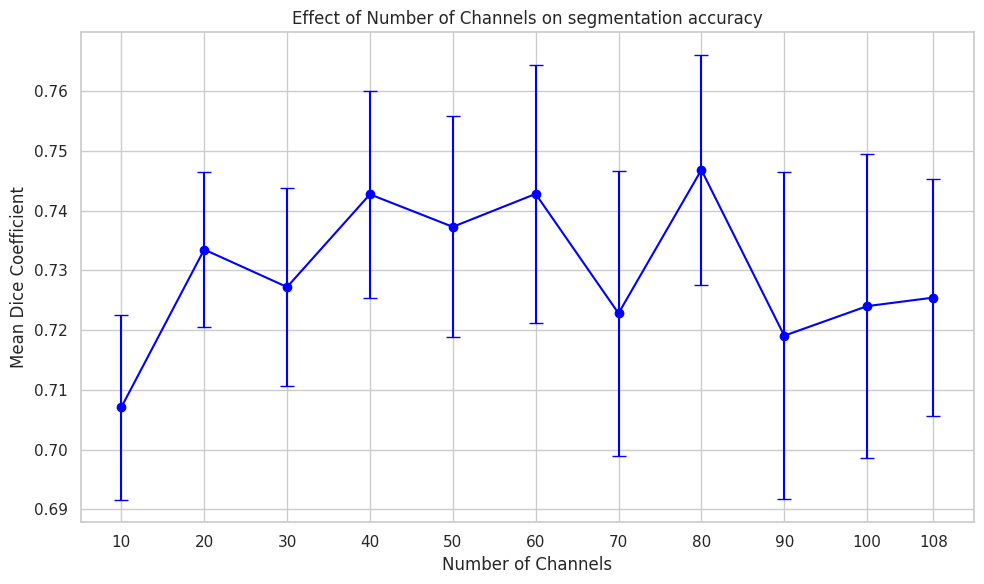

 Channels     Formatted
       10 0.707 ± 0.016
       20 0.734 ± 0.013
       30 0.727 ± 0.016
       40 0.743 ± 0.017
       50 0.737 ± 0.019
       60 0.743 ± 0.022
       70 0.723 ± 0.024
       80 0.747 ± 0.019
       90 0.719 ± 0.027
      100 0.724 ± 0.025
      108 0.725 ± 0.020


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
# Group by Channels
df['Channels'] = df['directory_name'].str.extract(r'(\d+)xChannels').astype(int)

# Step 2: Group by channel number
grouped = df.groupby('Channels')['last_value']

# Step 3: Compute stats
summary = grouped.agg(['mean', 'std', 'count']).reset_index()
summary['sem'] = summary['std'] / np.sqrt(summary['count'])  # standard error
summary['t'] = summary['count'].apply(lambda n: stats.t.ppf(0.975, df=n-1))  # 95% CI
summary['ci'] = summary['t'] * summary['sem']
summary['Formatted'] = summary.apply(lambda row: f"{row['mean']:.3f} ± {row['ci']:.3f}", axis=1)

# Step 4: Plot mean ± CI
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.errorbar(summary['Channels'], summary['mean'], yerr=summary['ci'], fmt='-o', capsize=5, color='blue')
plt.title('Effect of Number of Channels on segmentation accuracy')
plt.xlabel('Number of Channels')
plt.ylabel('Mean Dice Coefficient')
plt.xticks(summary['Channels'])
plt.tight_layout()
plt.show()

# Step 5: Print summary table
table_df = summary[['Channels', 'Formatted']]
print(table_df.to_string(index=False))

/tmp/ipykernel_4082756/2388730301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Channels', y='last_value', palette='Set3')


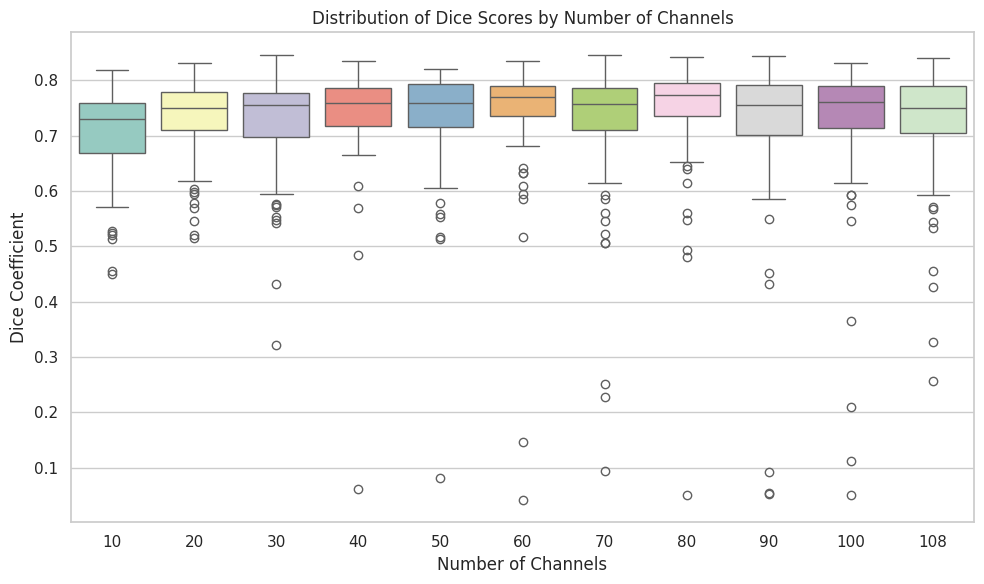

In [21]:
#violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Channels', y='last_value', palette='Set3')
plt.title('Distribution of Dice Scores by Number of Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Dice Coefficient')
plt.tight_layout()
plt.show()


/tmp/ipykernel_4082756/1927127471.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


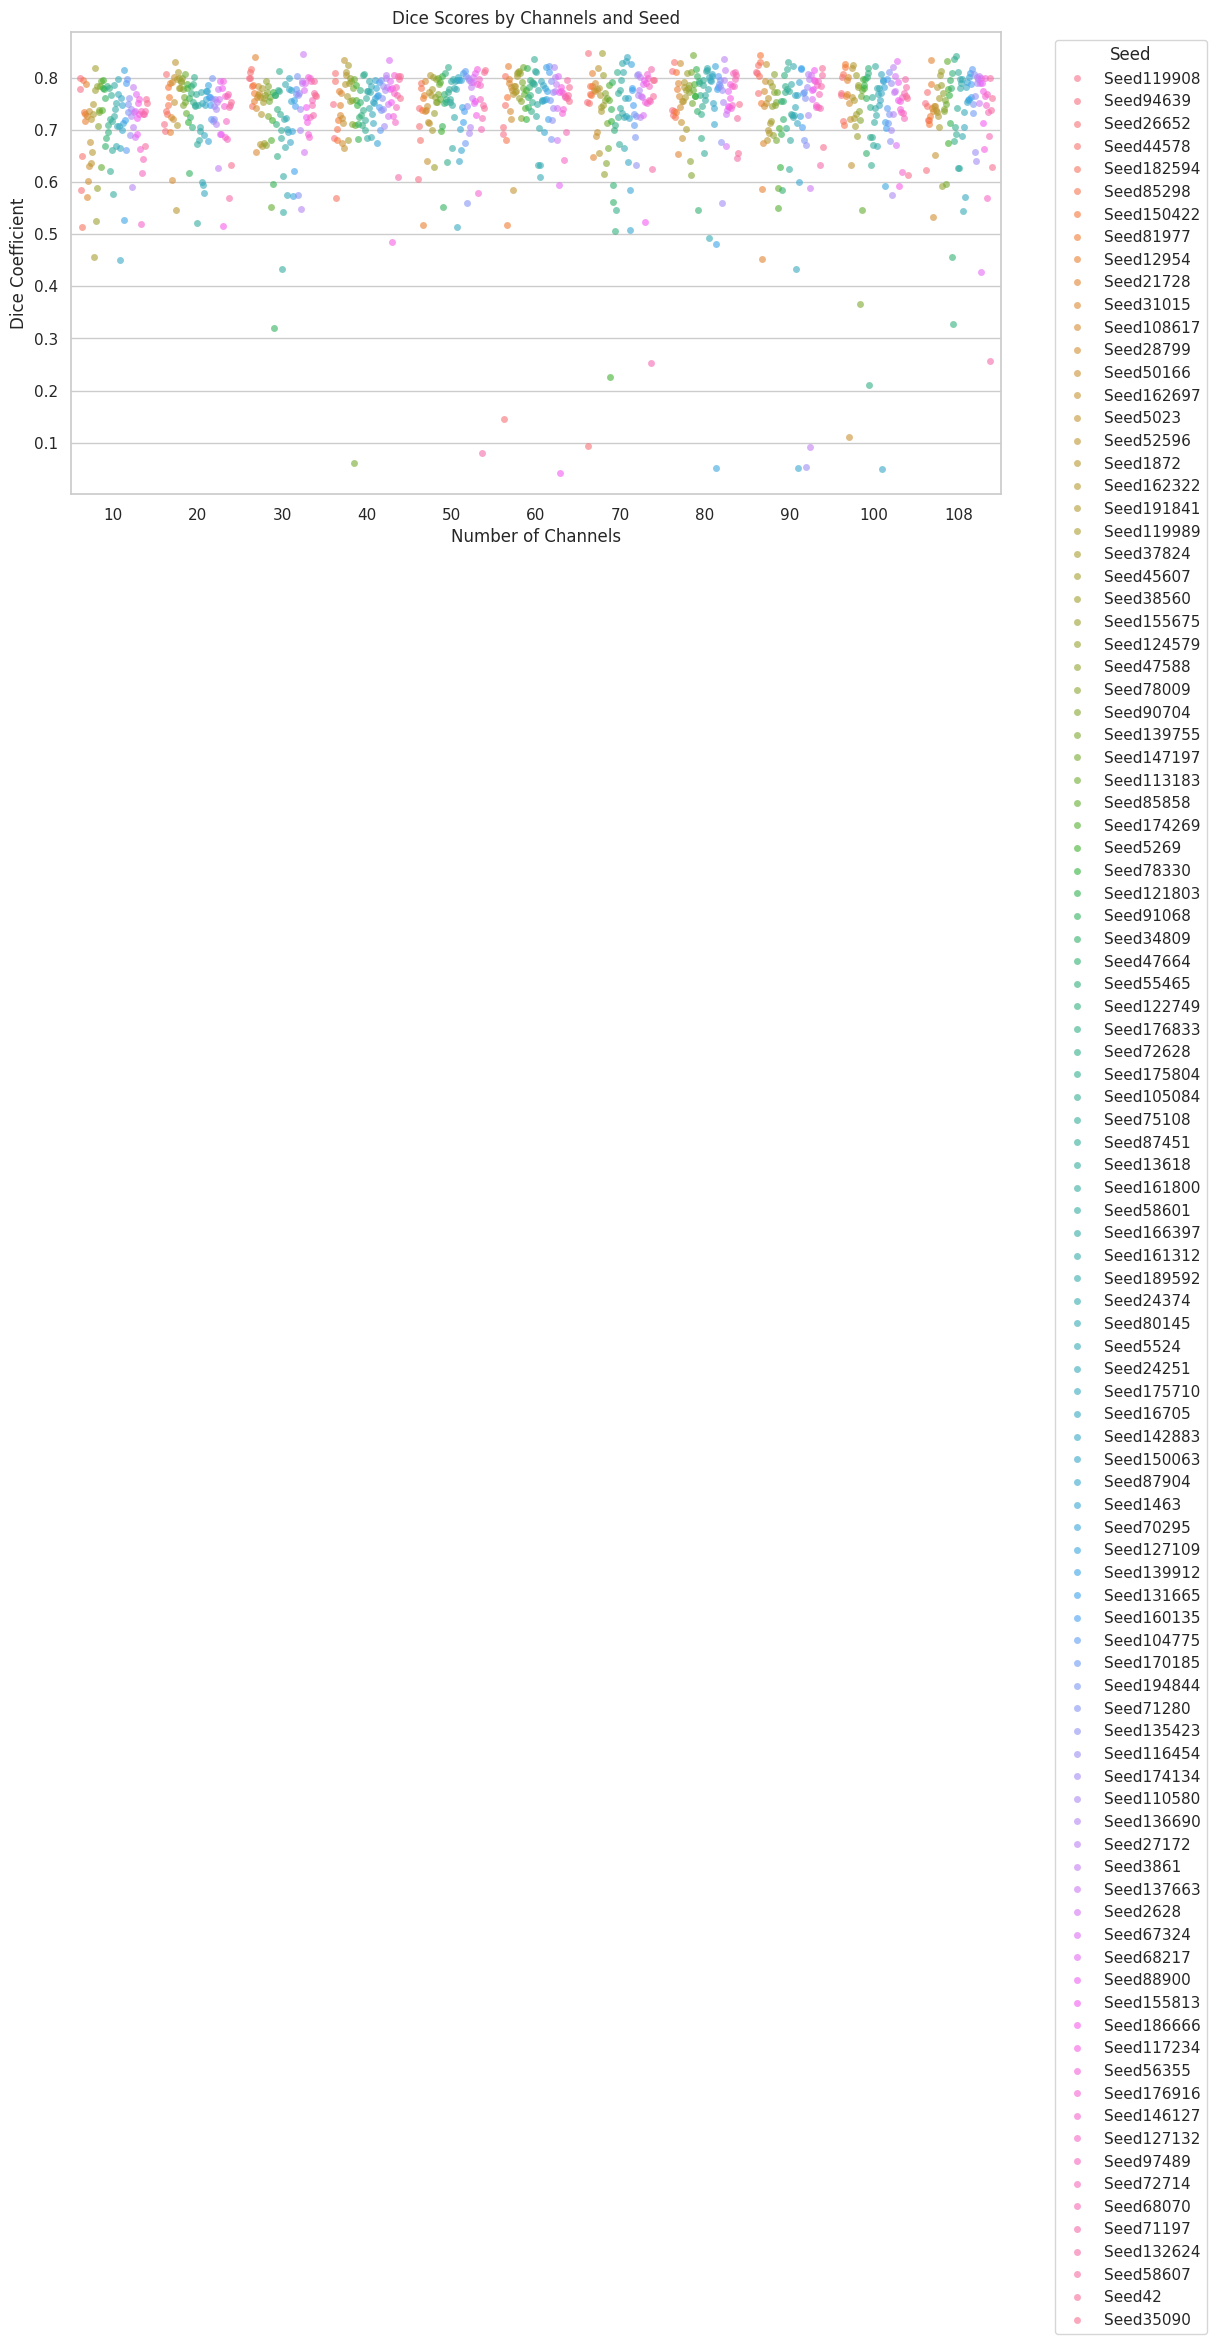

In [22]:
# scatter per seed
# Extract Seed number from directory name
df['Seed'] = df['directory_name'].str.extract(r'(Seed\d+)')

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Channels', y='last_value', hue='Seed', dodge=True, jitter=True, alpha=0.6)
plt.title('Dice Scores by Channels and Seed')
plt.xlabel('Number of Channels')
plt.ylabel('Dice Coefficient')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Seed')
plt.tight_layout()
plt.show()


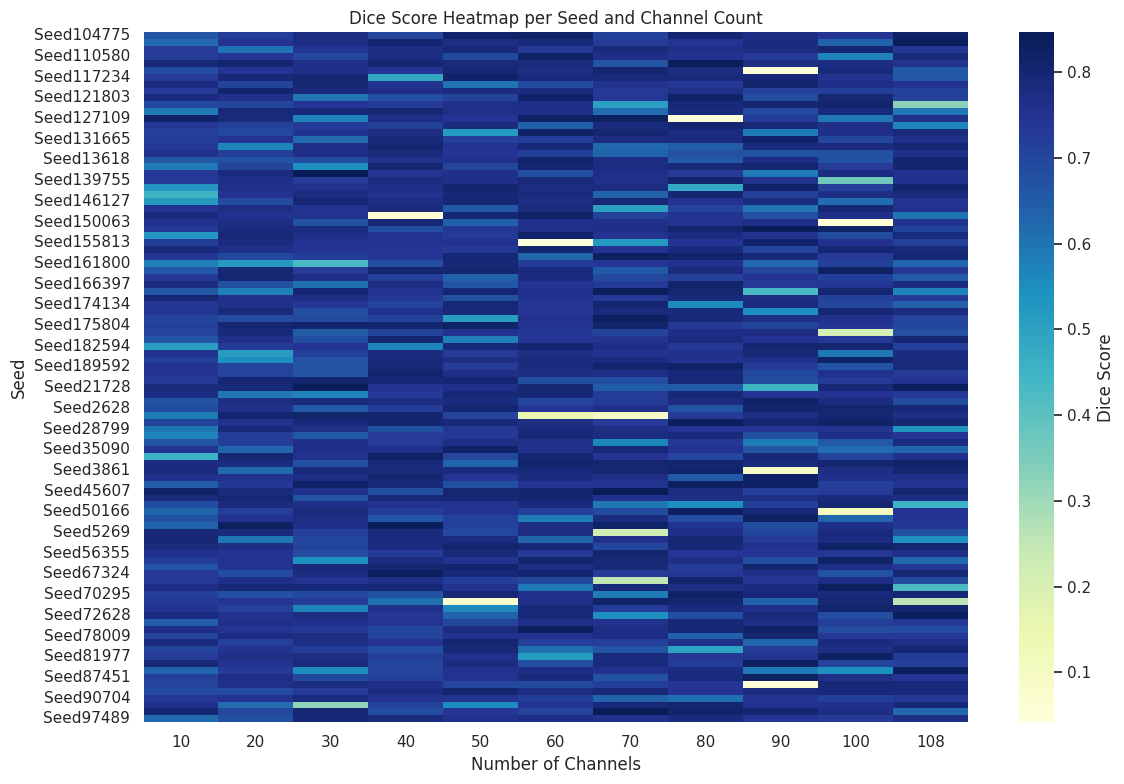

In [23]:
#heatmap
pivot = df.pivot_table(values='last_value', index='Seed', columns='Channels')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Dice Score'})
plt.title('Dice Score Heatmap per Seed and Channel Count')
plt.xlabel('Number of Channels')
plt.ylabel('Seed')
plt.tight_layout()
plt.show()


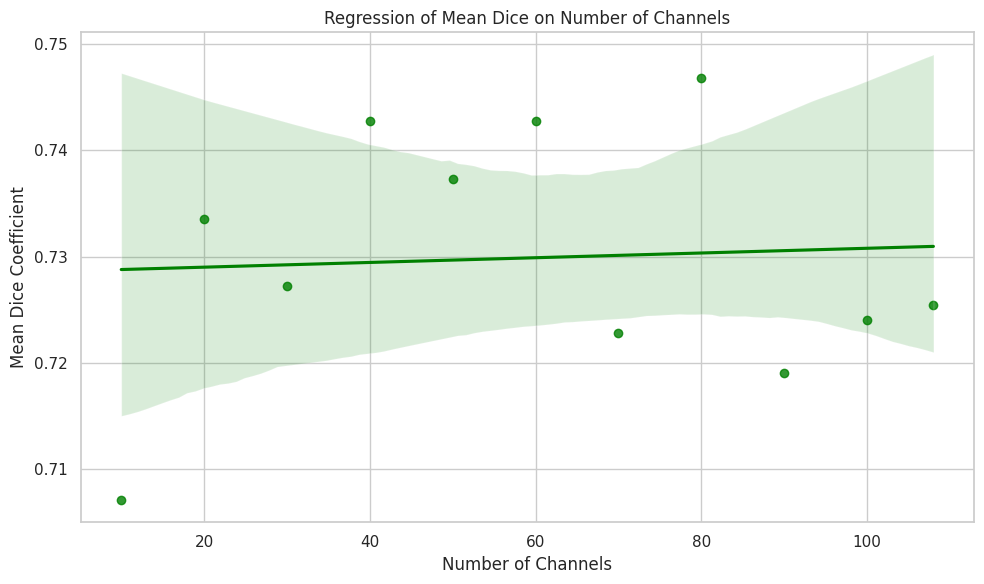

In [24]:
#trend regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=summary, x='Channels', y='mean', ci=95, marker='o', color='green')
plt.title('Regression of Mean Dice on Number of Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Mean Dice Coefficient')
plt.tight_layout()
plt.show()
